In [65]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
diabetes_data=pd.read_csv("diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [67]:
diabetes_data.shape

(2000, 9)

In [68]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [69]:
#Let's check the ratio among the positive and negative value in the dataset 0->Non diabetic 1->Diabetic
diabetes_data['Outcome'].value_counts()

Outcome
0    1316
1     684
Name: count, dtype: int64

In [70]:
#Let us check for the null values count in the dataset
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [71]:
#Observations:

#1. There are 2000 rows and 9 columns

#2. There are zero NaN values

#3. There are 1316 negative cases and 684 positive cases

<Axes: xlabel='Outcome', ylabel='count'>

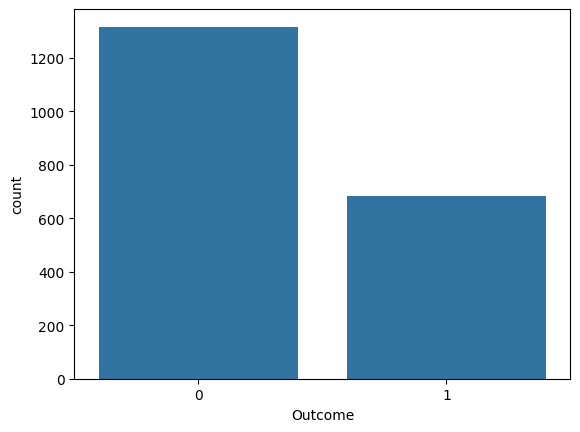

In [72]:
#Countplot of Outcome
sns.countplot(x=diabetes_data['Outcome'], data=diabetes_data)

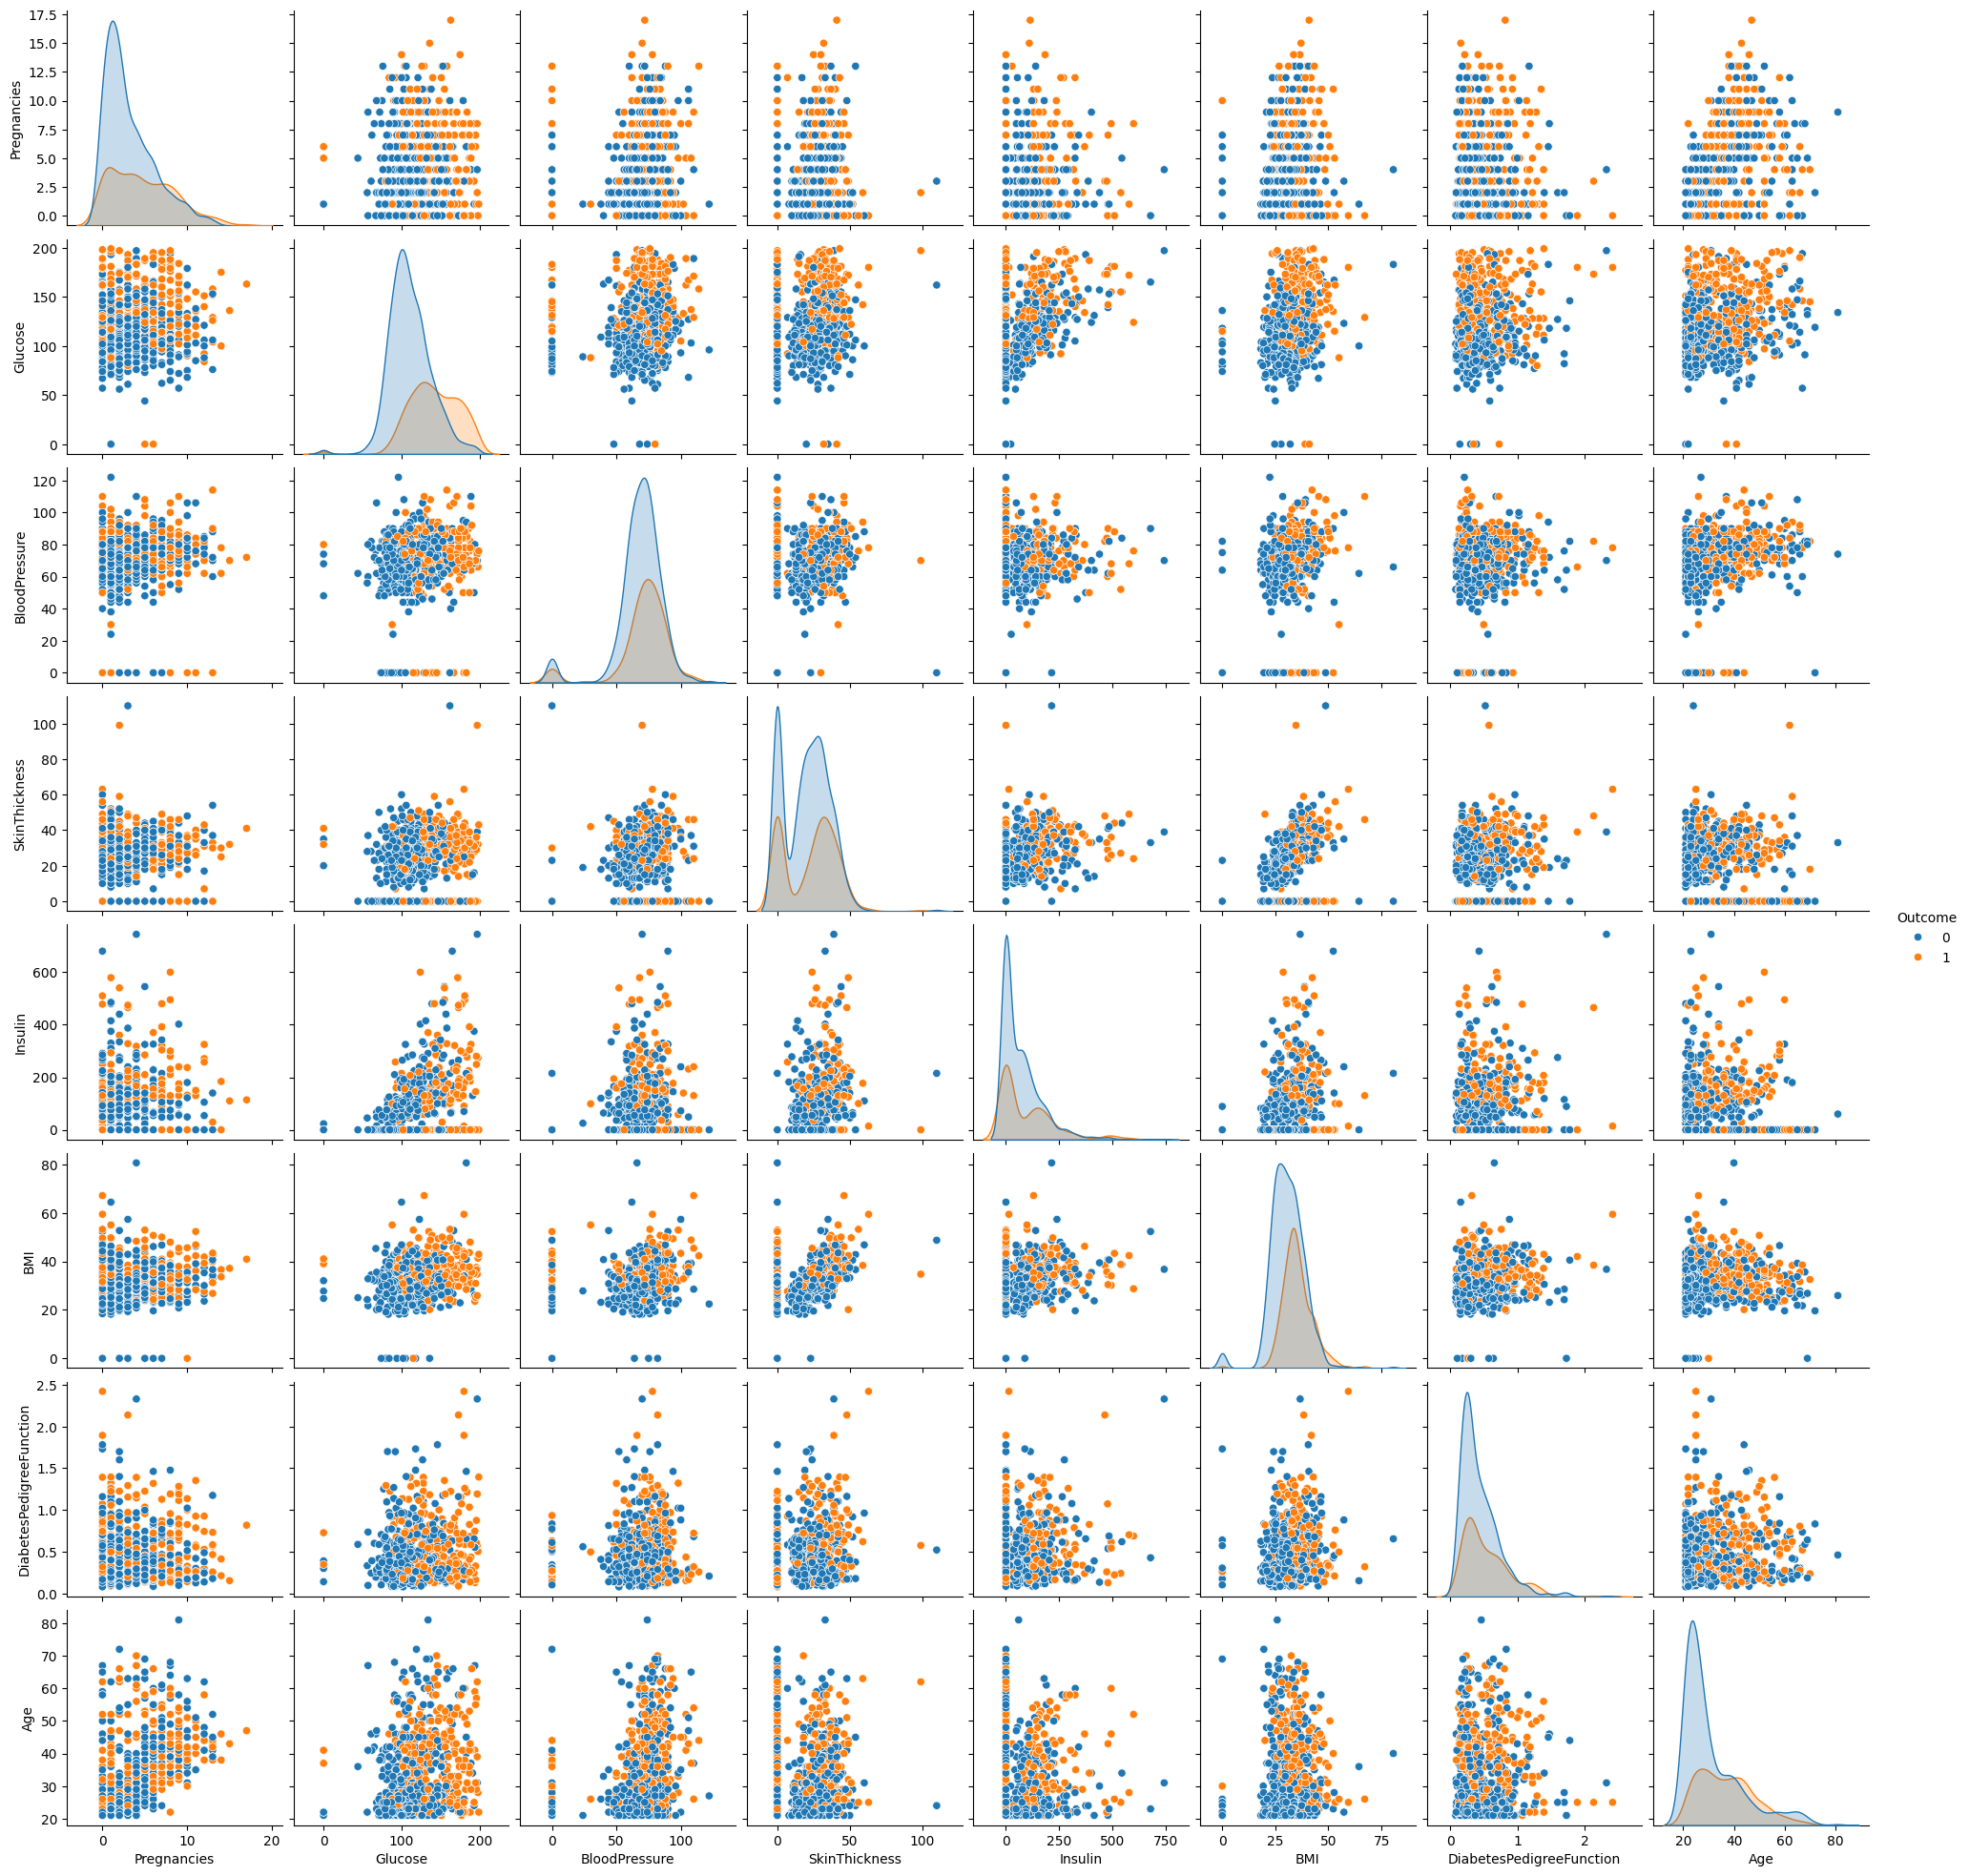

In [73]:
#Using Pairplot we can have graphs for each measure
sns.pairplot(diabetes_data,hue='Outcome')

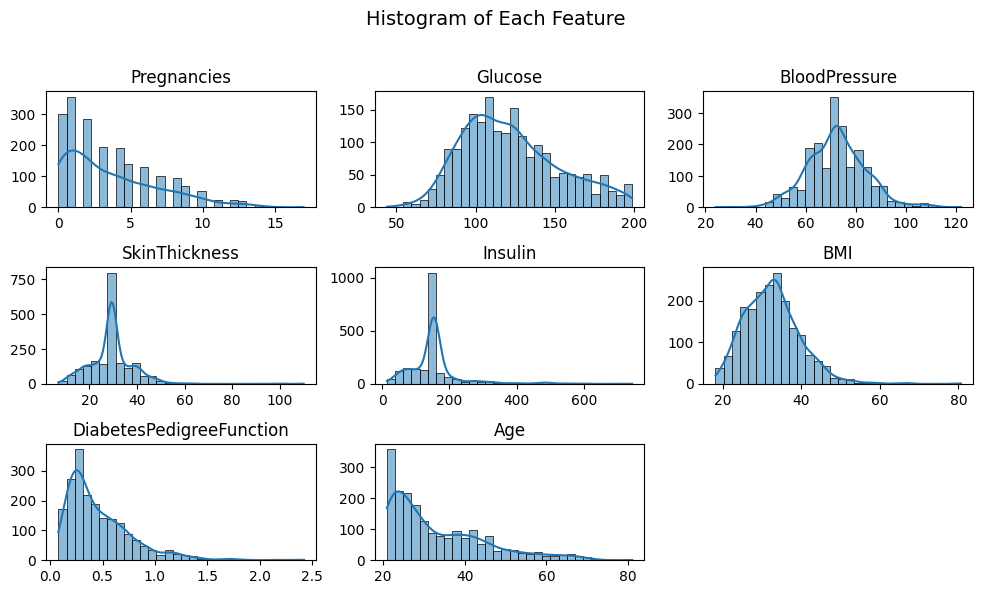

In [74]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))
plt.suptitle('Histogram of Each Feature', fontsize=14)
feature_names = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']

# Create a histogram for each feature
for i, feature in enumerate(feature_names):
    plt.subplot(3, 3, i+1)  # Adjust the subplot grid size based on the number of features
    sns.histplot(new_data[feature], bins=30, kde=True)
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout(pad=1.0, rect=[0, 0, 1, 0.96])
plt.show()


<Axes: >

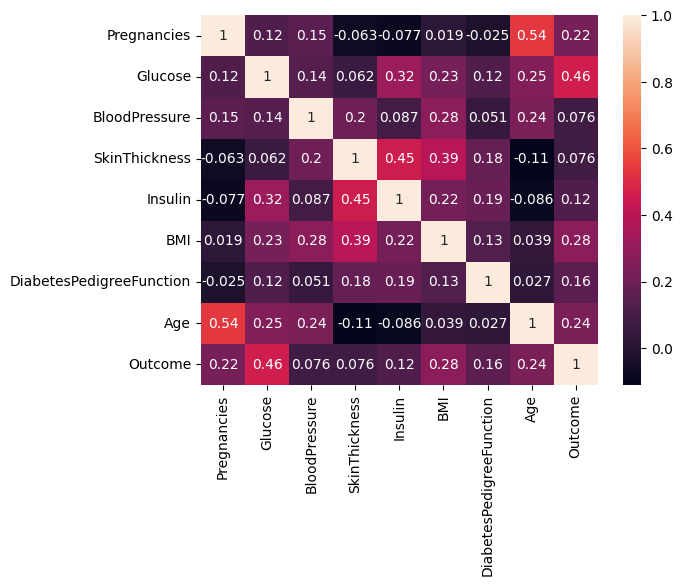

In [75]:
#Use of heatmap to clearly understand the correlation among the measures
sns.heatmap(diabetes_data.corr(),annot=True)

In [76]:
#Observations:

#1. The countplot tells us that the dataset is imbalanced, as the number of patients having diabetes is less than the those who don't.

#2. From the correlation heatmap, we can see that there is high correlation between Outcome and [Glucose, BMI, Age, Pregnancies].

In [77]:
#Data Processing
new_data=diabetes_data

In [78]:
#replacing null values with NaN
new_data[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction","Age"]] = diabetes_data[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI","DiabetesPedigreeFunction","Age"]].replace(0, np.nan)

In [79]:
#Count of NaN
new_data.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [80]:
#Replacing NaN values with the mean values
new_data.fillna({'Glucose':diabetes_data['Glucose'].mean()},inplace=True)
new_data.fillna({'BloodPressure':diabetes_data['BloodPressure'].mean()},inplace=True)
new_data.fillna({'SkinThickness':diabetes_data['SkinThickness'].mean()},inplace=True)
new_data.fillna({'Insulin':diabetes_data['Insulin'].mean()},inplace=True)
new_data.fillna({'DiabetesPedigreeFunction':diabetes_data['DiabetesPedigreeFunction'].mean()},inplace=True)
new_data.fillna({'Age':diabetes_data['Age'].mean()},inplace=True)
new_data.fillna({'BMI':diabetes_data['BMI'].mean()},inplace=True)


In [81]:
new_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.703500,3.306063,0.000,1.000,3.000000,6.000000,17.00
Glucose,2000.0,121.975340,30.533114,44.000,99.000,118.000000,141.000000,199.00
BloodPressure,2000.0,72.403665,11.949531,24.000,64.000,72.000000,80.000000,122.00
SkinThickness,2000.0,29.341275,9.123652,7.000,25.000,29.341275,32.000000,110.00
Insulin,2000.0,153.743295,80.376307,14.000,120.000,153.743295,153.743295,744.00
BMI,2000.0,32.650101,7.190136,18.200,27.600,32.400000,36.800000,80.60
DiabetesPedigreeFunction,2000.0,0.470930,0.323553,0.078,0.244,0.376000,0.624000,2.42
Age,2000.0,33.090500,11.786423,21.000,24.000,29.000000,40.000000,81.00
Outcome,2000.0,0.342000,0.474498,0.000,0.000,0.000000,1.000000,1.00


In [82]:
#Feature Scaling using MinMaxScaler
#Normalization of Features: MinMaxScaler scales features to a specified range, usually between 0 and 1. 
#Normalizing features is often important in machine learning to ensure that all features contribute equally to the analysis. 
#In the case of diabetes prediction, features like blood glucose levels, blood pressure, and body mass index (BMI) may have different scales, and normalizing them using MinMaxScaler can help in achieving better model performance.
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
scaled_data=sc.fit_transform(new_data)

In [83]:
#'scaled_data' is a NumPy array hence it must be converted into a dataframe
column_names = ["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age","Outcome"]
scaled_dataset = pd.DataFrame(scaled_data, columns=column_names)

In [84]:
scaled_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.117647,0.606452,0.387755,0.271845,0.191429,0.246795,0.020922,0.433333,1.0
1,0.000000,0.258065,0.591837,0.233010,0.152055,0.320513,0.066183,0.033333,0.0
2,0.000000,0.651613,0.493915,0.216906,0.191429,0.416667,0.235696,0.166667,1.0
3,0.000000,0.587097,0.448980,0.339806,0.323288,0.386218,0.122545,0.050000,1.0
4,0.058824,0.612903,0.387755,0.330097,0.638356,0.360577,0.195559,0.000000,0.0


In [85]:
X=scaled_dataset[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']]
y=scaled_dataset['Outcome']

In [86]:
#Splitting X and y into trian and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [87]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (1400, 8)
X_test shape: (600, 8)
Y_train shape: (1400,)
Y_test shape: (600,)


In [88]:
#Data Modelling
#logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=42)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=42)

/var/folders/fy/y4shmy315318kltqsttrz3cm0000gn/T/ipykernel_6378/1356225569.py:14: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  acc = pd.concat([acc, pd.Series(metrics.accuracy_score(prediction, y_test))], ignore_index=True)


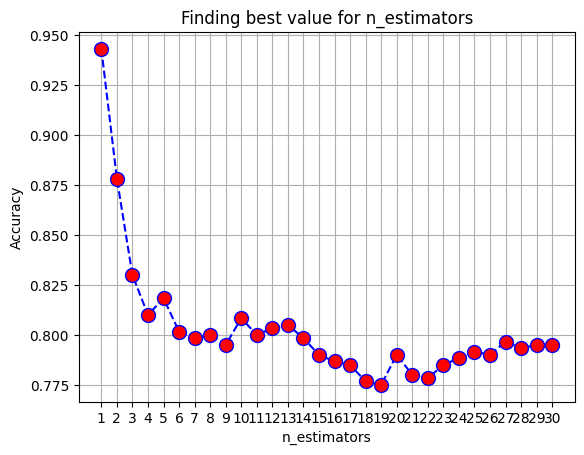

Highest value: 0.9433333333333334


In [89]:
#knneighbors Algorithm
#plotting a graph for n neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X_axis=list(range(1,31))
acc=pd.Series()
x=range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    prediction = knn_model.predict(X_test)
    acc = pd.concat([acc, pd.Series(metrics.accuracy_score(prediction, y_test))], ignore_index=True)

plt.plot(X_axis,acc, color='blue', linestyle='dashed',marker='o', markerfacecolor='red',markersize=10)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value:',acc.values.max())

Text(0, 0.5, 'Error Rate')

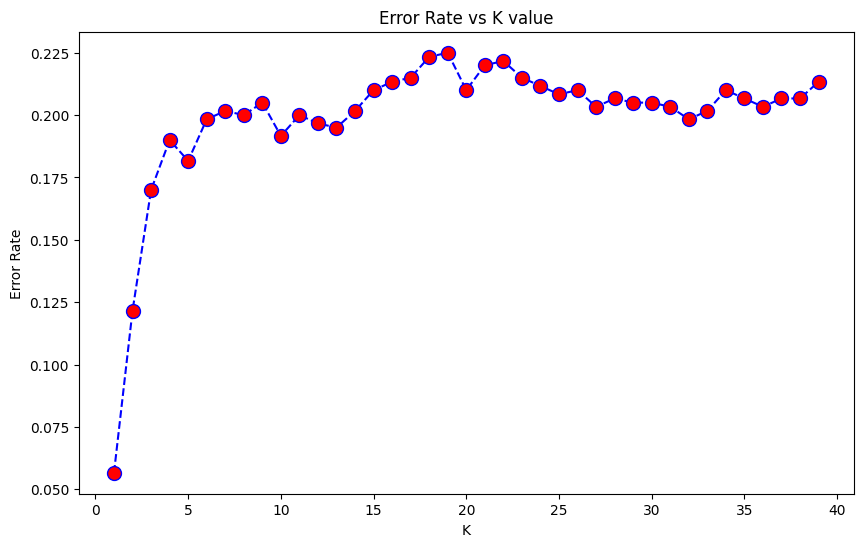

In [90]:
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error_rate.append(np.mean(pred_i!=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, color='blue', linestyle='dashed',marker='o', markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [91]:
#As from the above two graphs the best value for n is 1
#K nearest neighbors Algorithm
#metric='minkowski', parameter specifies the distance metric used to measure the distance between points. 
#'minkowski' is a generalization of the Euclidean and Manhattan distances. It's controlled by another parameter p.
#p=2:It controls the power parameter for the Minkowski metric. When p=2, it represents the Euclidean distance, and when p=1, it represents the Manhattan distance.
knn=KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [92]:
#Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc=SVC(kernel='linear',random_state=42)
svc.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [93]:
#Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [94]:
#Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree=DecisionTreeClassifier(criterion='entropy',random_state=42)
#criterion='entropy':Criterion used to measure the quality of a split.Entropy measures the impurity or disorder of a set of labels. 
#The algorithm aims to minimize entropy, leading to more homogeneous subsets at each node of the tree.
dectree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

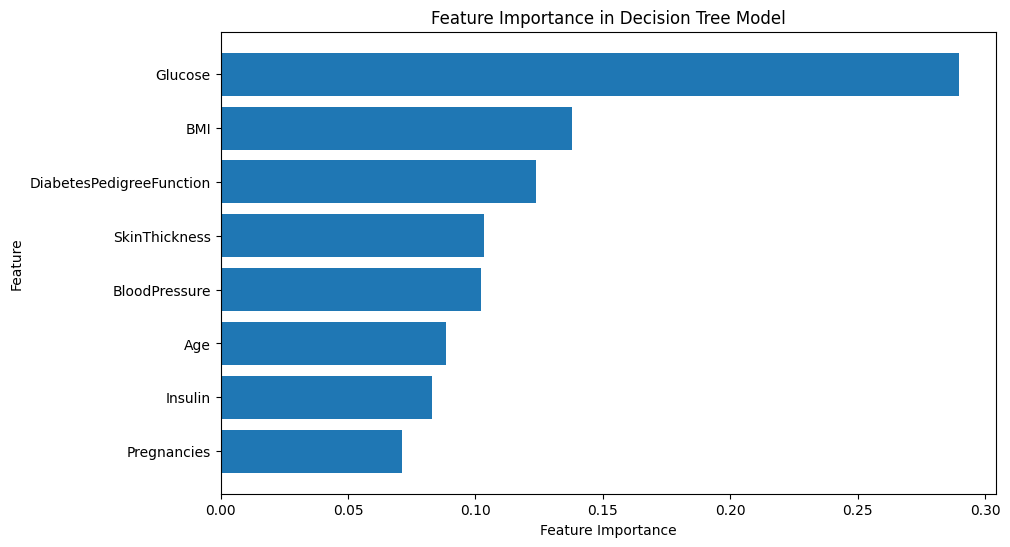

In [95]:
# Get feature importances
importances = dectree.feature_importances_
feature_names = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']


# Create a DataFrame for the feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Model')
plt.gca().invert_yaxis()
plt.show()


[Text(0.46893939393939393, 0.9705882352941176, 'Glucose <= 0.539\nentropy = 0.927\nsamples = 1400\nvalue = [921.0, 479.0]\nclass = No'),
 Text(0.14469696969696969, 0.9117647058823529, 'Age <= 0.125\nentropy = 0.684\nsamples = 875\nvalue = [716, 159]\nclass = No'),
 Text(0.3068181818181818, 0.9411764705882353, 'True  '),
 Text(0.07272727272727272, 0.8529411764705882, 'SkinThickness <= 0.215\nentropy = 0.381\nsamples = 499\nvalue = [462, 37]\nclass = No'),
 Text(0.048484848484848485, 0.7941176470588235, 'Insulin <= 0.047\nentropy = 0.092\nsamples = 256\nvalue = [253, 3]\nclass = No'),
 Text(0.03636363636363636, 0.7352941176470589, 'Insulin <= 0.045\nentropy = 0.439\nsamples = 33\nvalue = [30, 3]\nclass = No'),
 Text(0.024242424242424242, 0.6764705882352942, 'BMI <= 0.304\nentropy = 0.206\nsamples = 31\nvalue = [30, 1]\nclass = No'),
 Text(0.012121212121212121, 0.6176470588235294, 'entropy = 0.0\nsamples = 30\nvalue = [30, 0]\nclass = No'),
 Text(0.03636363636363636, 0.6176470588235294, '

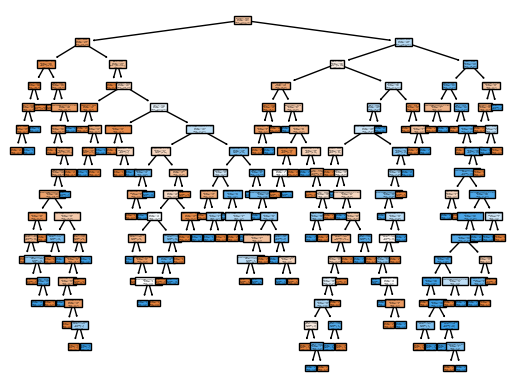

In [96]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plot_tree(dectree, filled=True, feature_names=X.columns, class_names=['No','Yes'])

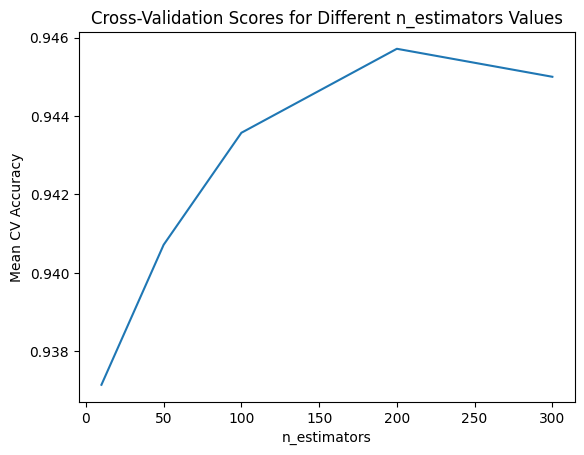

In [97]:
#Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
ranfo=RandomForestClassifier(n_estimators=11,criterion='entropy',random_state=42)

# List of values for n_estimators to try
n_estimators_values = [10, 50, 100, 200, 300]

# Dictionary to store mean cross-validation scores for each n_estimators value
cv_scores = {}

for n_estimators in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[n_estimators] = scores.mean()

# Plotting the mean cross-validation scores
plt.plot(list(cv_scores.keys()), list(cv_scores.values()))
plt.xlabel('n_estimators')
plt.ylabel('Mean CV Accuracy')
plt.title('Cross-Validation Scores for Different n_estimators Values')
plt.show()

In [98]:
#Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfo=RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=42)
ranfo.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=42)

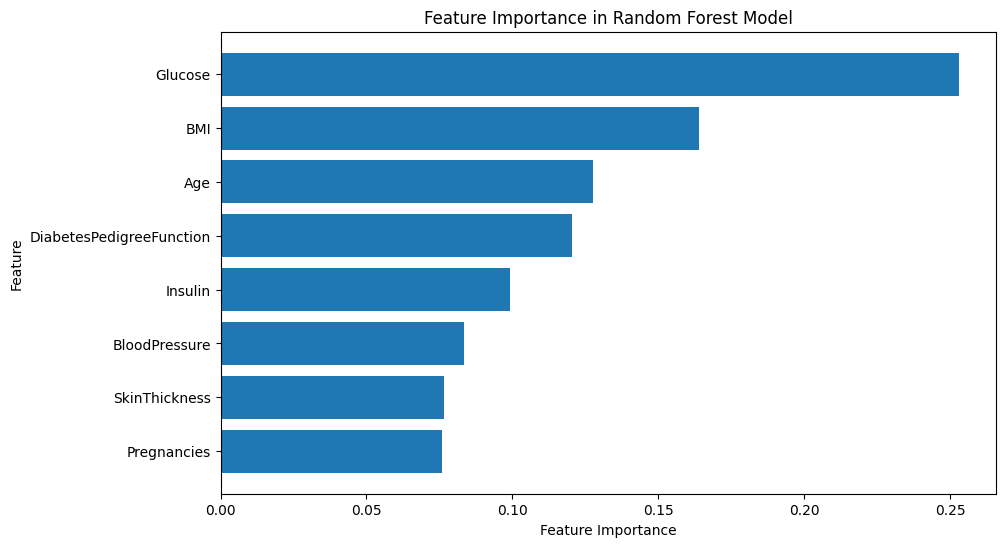

In [99]:
# Get feature importances
importances = ranfo.feature_importances_
feature_names = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']

# Create a DataFrame for the feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

In [100]:
y_pred_logreg=logreg.predict(X_test)
y_pred_knn=knn.predict(X_test)
y_pred_svc=svc.predict(X_test)
y_pred_nb=nb.predict(X_test)
y_pred_dectree=nb.predict(X_test)
y_pred_ranfor=ranfo.predict(X_test)

In [101]:
#Model Evaluation
from sklearn.metrics import accuracy_score
accuracy_logreg=accuracy_score(y_test,y_pred_logreg)
accuracy_knn=accuracy_score(y_test,y_pred_knn)
accuracy_dectree=accuracy_score(y_test,y_pred_dectree)
accuracy_ranfor=accuracy_score(y_test,y_pred_ranfor)

In [102]:
#Model Comparison
models=pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random forest'],
    'Score': [100*round(accuracy_logreg,4),100*round(accuracy_knn,4),  100*round(accuracy_dectree,4), 100*round(accuracy_ranfor,4)]
})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Random forest,95.00
1,KNN,94.33
0,Logistic Regression,75.67
2,Decision Tree,74.67


In [103]:
#From the above comparison, we can observe that Random Forest gets the highest accuracy of 95%
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_ranfor)
cm

array([[383,  12],
       [ 18, 187]])

In [104]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_ranfor))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       395
         1.0       0.94      0.91      0.93       205

    accuracy                           0.95       600
   macro avg       0.95      0.94      0.94       600
weighted avg       0.95      0.95      0.95       600



In [105]:
model=ranfo
import joblib
# Serialize and save the model
joblib.dump(model, 'diabetes.joblib')

['diabetes.joblib']